<a href="https://colab.research.google.com/github/ANKURKHATRI1-PRO/AI-Powered-Resume-Shortlisting-Tool/blob/main/Resume_Shortlisting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [2]:
import pandas as pd
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Data Cleaning and Preprocessing

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# download required nlkt resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True


# Text Normalization lowercase,punctuation removal
# Tokenization and stopword removel

In [4]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [5]:
print(df.columns)

Index(['Category', 'Resume'], dtype='object')


In [6]:
# Define a preprocessing Function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a string
    return " ".join(tokens)

# Apply the preprocessing to Resume column
df['Cleaned_Resume'] = df['Resume'].apply(preprocess_text)

# Show Cleaned Data
df[['Category', 'Cleaned_Resume']].head()

,Category,Cleaned_Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 may 2017 uitrgpv dat...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


# Explore and visualize the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

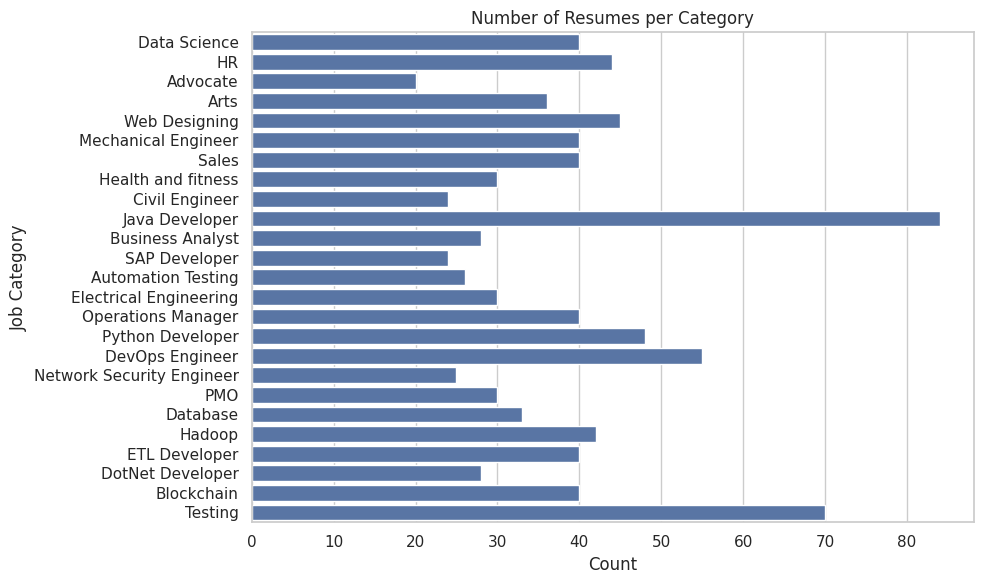

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Set style for plots
sns.set(style="whitegrid")

# Plot Category Distribution
category_counts = Counter(df['Category'])

plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.values()), y=list(category_counts.keys()))
plt.title("Number of Resumes per Category")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show

In [8]:
# Generate World Cloud Per Category
def plot_wordcloud(category):
    text = " ".join(df[df['Category'] == category]['Cleaned_Resume'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.show()



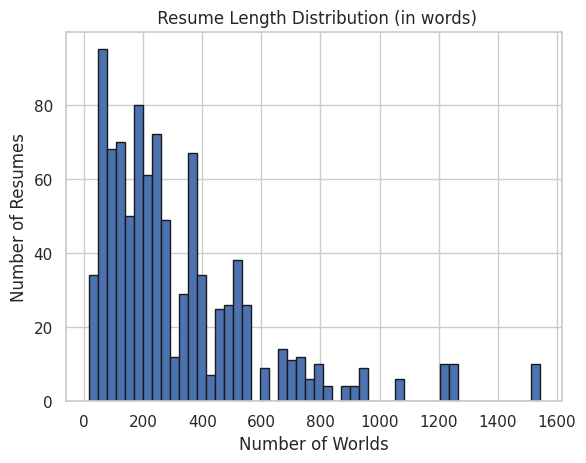

In [46]:
# Calculate the lenth of each cleaned resume
df['Resume_Length'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))

# Plot the Distribution
plt.hist(df['Resume_Length'], bins=50, edgecolor='k')
plt.title(" Resume Length Distribution (in words)")
plt.xlabel("Number of Worlds")
plt.ylabel("Number of Resumes")
plt.show()


# Feature extraction
# TF-IDF Vectorization to convert text into numerical features
# TF-IDF Gives importance to frequent terms in a document
# Reduce weight for terms that appear in many documents

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
Tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the cleaned resume text
X = Tfidf.fit_transform(df['Cleaned_Resume'])

# Labels(Job category)
y = df['Category']

In [11]:
# Check the Shape of TF-IDF Matrix
print("TF-IDF Matrix Shape",X.shape)

TF-IDF Matrix Shape (962, 3000)


In [12]:
df

,Category,Resume,Cleaned_Resume,Resume_Length
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,493
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 uitrgpv dat...,128
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,194
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,739
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,55
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...,239
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...,213
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,326
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge mspower poin...,92


In [13]:
# Convert Sparse Matrix to Dense

# Get Feature Names(Words)
feature_names = Tfidf.get_feature_names_out()

# Convert a Small Sample to DataFrame
sample_df = pd.DataFrame(X[:5].toarray(), columns= feature_names)
# Show Sample
sample_df.head()


,01,02,07,08,10,100,10g,10magicalfingers,11,1180,...,yallaspree,yarn,year,york,young,yr,zaggle,zensar,zhypility,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.015072,0.0,0.091957,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.246851,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.294980,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.058923,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.457229,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Training a classification Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9948186528497409


# Here you can see logistic regression model is giving awesome accuracy

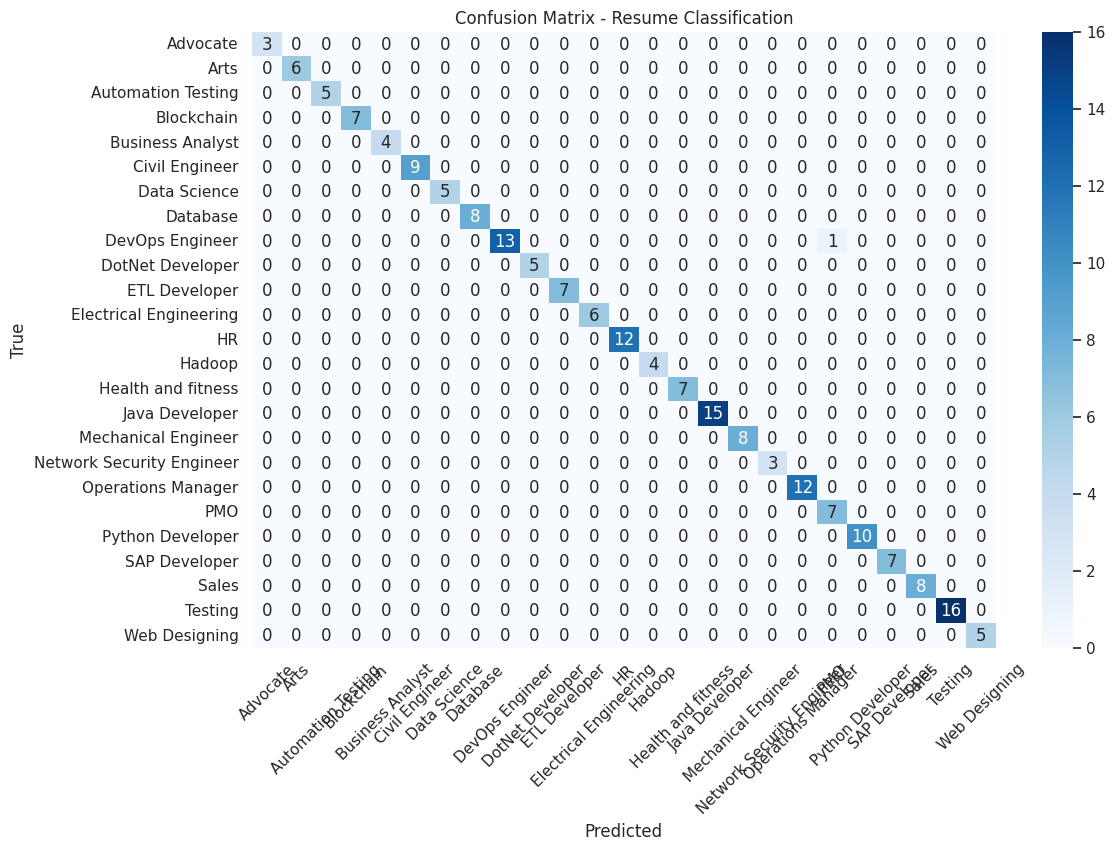

In [15]:
# Create aConfusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the Confusion Matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Resume Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Confusion matrix helps you where model is doing well and where it is misclassifying resumes between job category

In [16]:
from sklearn.model_selection import cross_val_score

# Initialize the Model
model_cv = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

# Output Results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Accuracy Scores: [0.97927461 1.         1.         1.         1.        ]
Mean Accuracy: 0.9958549222797928
Standard Deviation: 0.008290155440414494


- cross-validation helps assess your model’s performance more robustly by testing it across multiple splits of the data.

In [48]:
# Extract skills from the cleaned resume text
def extract_skills(text, required_skills):
    # Split the text into words
    words = set(text.split())
    # Find the intersection of the words and the required skills
    # Corrected the typo from required_required_skills to required_skills
    extracted = words.intersection(set(required_skills))
    return list(extracted)

# Target Skill Set for “Data Science”
# Define the score_resume function here, before it's applied
# score = (number of matched skills / total required skills) * 100
job_required_skills = [
    "python", "machine learning", "data analysis", "pandas", "numpy", "scikit-learn",
    "tensorflow", "keras", "pytorch", "sql", "statistics", "matplotlib", "seaborn",
    "nlp", "deep learning"
]

def score_resume(skills):
    # Ensure the job_required_skills list is used directly for comparison
    matched = set(skills).intersection(set(job_required_skills))
    # Handle potential division by zero if job_required_skills is empty
    if len(job_required_skills) > 0:
        return round((len(matched) / len(job_required_skills)) * 100, 2)
    else:
        return 0.0 # Return 0 if no required skills are defined


# Apply the skill extraction
df["extracted_skills"] = df["Cleaned_Resume"].apply(lambda x: extract_skills(x, job_required_skills))

# Now you can apply the score_resume function to the 'extracted_skills' column
df["score"] = df["extracted_skills"].apply(score_resume)

# Optional: Extract name if available or assign dummy names
df["name"] = ["Candidate " + str(i) for i in range(len(df))]

# Final shortlisted output
shortlisted = df[["name", "extracted_skills", "score"]].sort_values(by="score", ascending=False)
print(shortlisted)

              name                                   extracted_skills  score
7      Candidate 7  [matplotlib, tensorflow, seaborn, nlp, python,...  46.67
37    Candidate 37  [matplotlib, tensorflow, seaborn, nlp, python,...  46.67
27    Candidate 27  [matplotlib, tensorflow, seaborn, nlp, python,...  46.67
17    Candidate 17  [matplotlib, tensorflow, seaborn, nlp, python,...  46.67
8      Candidate 8                          [python, numpy, sql, nlp]  26.67
..             ...                                                ...    ...
378  Candidate 378                                                 []   0.00
375  Candidate 375                                                 []   0.00
373  Candidate 373                                                 []   0.00
372  Candidate 372                                                 []   0.00
371  Candidate 371                                                 []   0.00

[962 rows x 3 columns]


# We'll compute a score for each resume using the following rule:
- If a candidate has all the job-required skills → 100

- If a candidate has half → 50

# Model saving and deployment for resume shortlister app

In [17]:
import pickle

# Create Directory path
import os
os.makedirs('resume _shortlister', exist_ok=True)
# Save Model
with open('resume _shortlister/Resume_Classification model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save TF-IDF Vectorizer
with open('resume _shortlister/tfidf_vectorizer model.pkl','wb') as vec_file:
    pickle.dump(Tfidf, vec_file)

In [18]:
from google.colab import files
files.download('resume _shortlister/Resume_Classification model.pkl')
files.download('resume _shortlister/tfidf_vectorizer model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import os
print("Current Working Directory", os.getcwd())

Current Working Directory /content
